In [69]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [71]:
df = pd.read_csv("../dataset/TRAIN_AWS/계룡.csv")
df = df.interpolate()
df["풍향(deg)"] = df["풍향(deg)"].apply(lambda x: x * 359)
df.drop(columns=["연도", "일시", "지점"], inplace=True)
df.head()

기온(°C)     풍향(deg)   풍속(m/s)  강수량(mm)  습도(%)
0  0.154818  147.489167  0.033248      0.0  0.830
1  0.142180   53.351389  0.030691      0.0  0.853
2  0.173776   73.196111  0.040921      0.0  0.802
3  0.169036  118.669444  0.048593      0.0  0.816
4  0.169036    0.000000  0.007673      0.0  0.827

In [72]:
scaler = preprocessing.StandardScaler()
scaled_feature = scaler.fit_transform(df.values)
scaled_df = pd.DataFrame(scaled_feature, columns=df.columns)
scaled_df.head()

기온(°C)   풍향(deg)   풍속(m/s)   강수량(mm)     습도(%)
0 -2.293940  0.318276  0.146215 -0.142907  0.528098
1 -2.365289 -0.471712  0.057525 -0.142907  0.632285
2 -2.186916 -0.305179  0.412287 -0.142907  0.401261
3 -2.213672  0.076426  0.678359 -0.142907  0.464680
4 -2.213672 -0.919427 -0.740691 -0.142907  0.514508

In [54]:
fig = px.line(scaled_df, x=[i for i in range(len(df))], y="기온(°C)")
fig.show()

In [55]:
fig = px.line(scaled_df, x=[i for i in range(len(df))], y="풍향(deg)")
fig.show()

In [45]:
fig = px.histogram(df, y="풍속(m/s)")
fig.show()

In [56]:
fig = px.line(scaled_df, x=[i for i in range(len(df))], y="풍속(m/s)")
fig.show()

In [57]:
fig = px.line(scaled_df, x=[i for i in range(len(df))], y="강수량(mm)")
fig.show()

In [58]:
fig = px.line(scaled_df, x=[i for i in range(len(df))], y="습도(%)")
fig.show()

벡터화

Text(0, 0.5, 'Wind Direction [deg]')

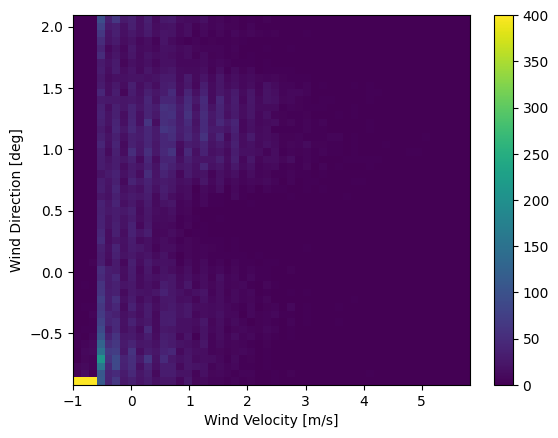

In [75]:
# 모든 feature 0~1로 정규화 필요
plt.hist2d(scaled_df["풍속(m/s)"], scaled_df["풍향(deg)"], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Velocity [m/s]')
plt.ylabel('Wind Direction [deg]')

In [76]:
wv = df['풍속(m/s)'].values # 풍속
wd_rad = df['풍향(deg)'].values * np.pi / 180 # 풍향

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

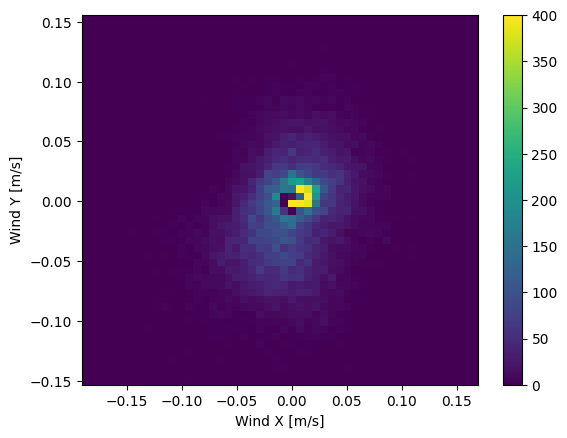

: 

In [78]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
plt.show()